# Import Libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import os

# Load and read data

In [54]:
data_path="data/"
data_files = os.listdir(data_path)
if (len(data_files) != 0):
    for datafile in data_files:
        if (not datafile[0] == "."):
            print(datafile)
            df = pd.read_csv(data_path + datafile, delimiter =";", decimal=",")
            break
        
df = pd.read_csv(data_path + 'DP980Y700_SDG3_2021_extended.csv', delimiter =";", decimal=",")
df.head()

DP980Y700_SDG3_2021.csv


,Coilnr,Date,Direction,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,n x1000,r x100,Re/Rm,...,After Soaking P3(C),After rapid cooling P4(C),Linespeed (m/min),Zink bottom (gr/m2),Zink top (gr/m2),SKP elongation (%),SKP Pressure (kN),C/s P1/P2,C/s P2/P3,C/s P3/P4
0,41971853,06-01-21,L,1.92,791,1058,107,63,68,75,...,800.987915,487.601574,51.922714,55.509306,54.877287,0.395166,8271.445498,1.223472,0.045591,-13.559891
1,41943566,08-01-21,L,1.01,690,1029,114,77,65,67,...,806.446350,497.245289,130.468628,60.863074,53.569768,0.453954,8263.117895,2.537354,0.113249,-33.617532
2,42071675,09-01-21,L,1.62,796,1037,106,60,67,77,...,818.309815,484.193967,78.013863,53.647423,53.234872,0.394861,7390.691312,1.634436,0.137986,-21.721390
3,42071668,09-01-21,L,1.62,745,1036,105,64,64,72,...,818.166443,481.330018,76.819946,53.221745,53.219945,0.394584,7435.146814,1.611650,0.092550,-21.563130
4,42071705,10-01-21,L,1.92,776,1006,95,62,68,77,...,796.503906,481.701958,63.891125,51.919579,54.494145,0.452333,6744.308326,1.550988,-0.254067,-16.760875


# EDA and Preprocessing

In [55]:
filters = df[["Date", "Direction", "Re/Rm"]]

target_re02 = df[["Re02 Mpa"]]
target_rm = df[["Rm Mpa"]]
target_A = df[["A80 x10%"]]

features = df.drop(target_A + target_re02 + target_rm + filters ,axis=1)

X = features
y = target_rm


# Train — Validation — Test

In [56]:
from sklearn.model_selection import train_test_split

# Train - Test

#X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)# Split train into train-val
#X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)


X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.20, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)
#Y_train_rm = Y_train_rm.values.ravel()
#Y_test_rm = Y_test_rm.values.ravel()


print(X_train.shape, X_val.shape, X_test.shape)





(461, 35) (52, 35) (129, 35)


In [57]:
scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler_out = StandardScaler()
scaler_out = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#y_train = scaler_out.fit_transform(y_train)
#y_val   = scaler_out.transform(y_val)
#y_test  = scaler_out.transform(y_test)

X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [58]:
print(X_train)
print(y_train)

[[0.46056151 0.16260163 0.87755102 ... 0.82231803 0.51725988 0.27305241]
 [0.22815397 0.28455285 0.79591837 ... 0.71167768 0.518661   0.43993035]
 [0.2281297  0.16260163 0.32653061 ... 0.84609182 0.48015621 0.25063042]
 ...
 [0.758678   0.66666667 0.55102041 ... 0.54147851 0.58103111 0.75845299]
 [0.882615   0.61788618 0.87755102 ... 0.3863867  0.45019648 0.7805566 ]
 [0.19596682 0.00813008 0.69387755 ... 0.85536749 0.38628132 0.13750289]]
[[1021]
 [1000]
 [1041]
 [ 998]
 [ 991]
 [1056]
 [1005]
 [1026]
 [1027]
 [1052]
 [1007]
 [1042]
 [ 977]
 [1040]
 [1045]
 [ 997]
 [1018]
 [1010]
 [1023]
 [1033]
 [1002]
 [1001]
 [1023]
 [1050]
 [1034]
 [1049]
 [ 986]
 [1027]
 [ 986]
 [1002]
 [1050]
 [1022]
 [1050]
 [1028]
 [1035]
 [1060]
 [1014]
 [1015]
 [1019]
 [1031]
 [1054]
 [ 989]
 [1009]
 [1082]
 [1042]
 [ 996]
 [1039]
 [1018]
 [ 986]
 [1045]
 [ 991]
 [1002]
 [1030]
 [1013]
 [1009]
 [ 995]
 [ 990]
 [ 988]
 [1037]
 [1053]
 [1016]
 [1042]
 [1038]
 [1048]
 [ 993]
 [1003]
 [1043]
 [1018]
 [1027]
 [10

# Neural Network

## Initialize Dataset

In [59]:
# Convert Output Variable to Float

y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)


In [60]:
class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [61]:
print(train_dataset[0])
print(test_dataset[0])


(tensor([0.4606, 0.1626, 0.8776, 0.5135, 0.7857, 0.4500, 0.3846, 0.7329, 0.5712,
        0.3521, 0.5934, 0.2750, 0.5000, 0.5283, 0.6460, 0.1645, 0.6343, 0.0507,
        0.4286, 0.3750, 0.2237, 0.2085, 0.3091, 0.3850, 0.3042, 0.2746, 0.3218,
        0.7833, 0.2157, 0.1825, 0.3469, 0.5407, 0.8223, 0.5173, 0.2731]), tensor([1021.]))
(tensor([0.2816, 0.1707, 0.8163, 0.2162, 0.4524, 0.6500, 0.3077, 0.2808, 0.4666,
        0.2351, 0.3297, 0.2000, 0.3043, 0.4698, 0.3805, 0.2194, 0.6637, 0.4885,
        0.6190, 0.3750, 0.2500, 0.1574, 0.3636, 0.4346, 0.4137, 0.3886, 0.2546,
        0.6626, 0.3093, 0.2760, 0.3435, 0.2295, 0.7293, 0.4575, 0.3608]), tensor([1011.]))


## Model Parameters

In [62]:
EPOCHS = 10000
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_FEATURES = len(X.columns)

## Initialize Dataloader

In [63]:
train_loader    = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader      = DataLoader(dataset=val_dataset, batch_size=1)
test_loader     = DataLoader(dataset=test_dataset, batch_size=1)

## Define Neural Network

One has a 3 layer feedforward neural net here. One uses ReLU as the activation at all layers.

In [64]:
class MultipleRegression(nn.Module):
    def __init__(self, num_features, num_hidden_neuron):
        super(MultipleRegression, self).__init__()
        # Couche d'entrée vers la couche cachée
        self.layer_1 = nn.Linear(num_features, num_hidden_neuron)
        # Cocuhe cachée vers la couche de sortie 
        self.layer_out= nn.Linear(num_hidden_neuron, 1)
        
        
    # Méthode appelée lors de l'apprentissage du PMC. 
    # Les fonctions d'activation des neurones de la couche 
    # cachée sont des sigmoïd. Le neurone de la couche de sortie
    # possède une fonction d'activation linéaire
    def forward(self, inputs):
        x = torch.sigmoid(self.layer_1(inputs))
        x = self.layer_out(x)
        return (x)
        
    # Méthode appelée lors du test
    def predict(self, test_inputs):
        x = torch.sigmoid(self.layer_1(test_inputs))
        x = self.layer_out(x)
        return (x)

## Define checkpoint to save the best model

In [65]:
def generate_unique_logpath(logdir, raw_run_name):
    i = 0
    while(True):
        run_name = raw_run_name + "_" + str(i)
        log_path = os.path.join(logdir, run_name)
        if not os.path.isdir(log_path):
            return log_path
        i = i + 1


###################################################
# Example usage :
# 1- create the directory "./logs" if it does not exist
top_logdir = "./logs"
if not os.path.exists(top_logdir):
    os.mkdir(top_logdir)

# 2- We test the function by calling several times our function
logdir = generate_unique_logpath(top_logdir, "linear")
print("Logging to {}".format(logdir))
# -> Prints out     Logging to   ./logs/linear_0
if not os.path.exists(logdir):
    os.mkdir(logdir)

class ModelCheckpoint:
    
    def __init__(self, filepath, model):
        self.min_loss = None
        self.filepath = filepath
        self.model = model

    def update(self, loss):
        if (self.min_loss is None) or (loss < self.min_loss):
            print("Saving a better model")
            torch.save(self.model.state_dict(), self.filepath)
            #torch.save(self.model, self.filepath)
            self.min_loss = loss

Logging to ./logs/linear_70


## Check if a GPU is available

In [66]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


## Define Mean Squared Error loss

In [67]:
model = MultipleRegression(NUM_FEATURES, 50)
model.to(device)

print("Model : ", model)
print("Paramètres du modèle : ", model.named_parameters)
print("Nombre de Paramètres du model : ",sum(p.numel() for p in model.parameters()))

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


Model :  MultipleRegression(
  (layer_1): Linear(in_features=35, out_features=50, bias=True)
  (layer_out): Linear(in_features=50, out_features=1, bias=True)
)
Paramètres du modèle :  <bound method Module.named_parameters of MultipleRegression(
  (layer_1): Linear(in_features=35, out_features=50, bias=True)
  (layer_out): Linear(in_features=50, out_features=1, bias=True)
)>
Nombre de Paramètres du model :  1851


## Train Model

In [68]:
loss_stats = {
    'train': [],
    "val": []
}

train_losses = []

model_checkpoint = ModelCheckpoint(logdir + "/best_model.pt", model)

print("Begin training.")

for e in tqdm(range(1, EPOCHS+1)):
    
        # TRAINING
        train_epoch_loss = 0
        model.train()
        for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
            optimizer.zero_grad()
        
            y_train_pred = model(X_train_batch)
        
            train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        
            train_loss.backward()
            optimizer.step()
        
            train_epoch_loss += train_loss.item()
        
        print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} ')

"""for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        model_checkpoint.update(train_epoch_loss)
        
    train_losses.append(train_epoch_loss)   
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
            loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')"""


Begin training.


  0%|          | 0/10000 [00:00<?, ?it/s]

Saving a better model
Epoch 001: | Train Loss: 1045834.28125 | Val Loss: 1044732.51562
Epoch 002: | Train Loss: 1044694.28125 | Val Loss: 1044083.35216
Epoch 003: | Train Loss: 1043439.39062 | Val Loss: 1043436.27524
Epoch 004: | Train Loss: 1042656.34375 | Val Loss: 1042787.98077


/home/antoine/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/antoine/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([13, 1, 1])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/antoine/anaconda3/lib/python3.8/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure

Epoch 005: | Train Loss: 1041941.25781 | Val Loss: 1042134.14663
Saving a better model
Epoch 006: | Train Loss: 1039360.16406 | Val Loss: 1041470.95072
Epoch 007: | Train Loss: 1042256.20312 | Val Loss: 1040795.69231
Epoch 008: | Train Loss: 1039529.46875 | Val Loss: 1040104.77043
Epoch 009: | Train Loss: 1037741.33594 | Val Loss: 1039398.03125
Saving a better model
Epoch 010: | Train Loss: 1039263.78125 | Val Loss: 1038673.98317
Saving a better model
Epoch 011: | Train Loss: 1039331.15625 | Val Loss: 1037932.41707
Epoch 012: | Train Loss: 1036123.63281 | Val Loss: 1037173.37500
Saving a better model
Epoch 013: | Train Loss: 1035589.32812 | Val Loss: 1036397.48077
Saving a better model
Epoch 014: | Train Loss: 1034623.00781 | Val Loss: 1035604.11899
Epoch 015: | Train Loss: 1034573.25000 | Val Loss: 1034792.67909
Epoch 016: | Train Loss: 1033728.29688 | Val Loss: 1033963.39543
Epoch 017: | Train Loss: 1035072.72656 | Val Loss: 1033115.99279
Epoch 018: | Train Loss: 1031731.22656 | Val 

10000


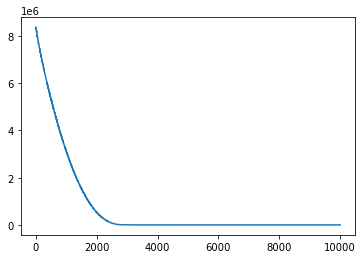

In [69]:
print(len(train_losses))
index = [i for i in range(len(train_losses))]

plt.plot(index[:], train_losses[:])
#plt.plot(index, train_losses)
plt.show()

ELU     : Epoch 1000: | Train Loss: 1081.63609 | Val Loss: 655.17292
Relu    : Epoch 1000: | Train Loss: 539.03319 | Val Loss: 332.48507

## Test Model

In [70]:
"""y_pred = []
y_true = []



with torch.no_grad():
        # We enter evaluation mode. This is useless for the linear model
        # but is important with layers such as dropout, batchnorm, ..
        model.eval()

        for i, (inputs, targets) in enumerate(test_loader):

            inputs, targets = inputs.to(device), targets.to(device)
            outputs = float(model(inputs))
            targets = float(targets)

            # Compute the forward pass, i.e. the scores for each input image
            print("--------------------------")
            #print("Inputs: ", inputs)
            print("Outputs: ", outputs)
            print("Target: ", targets)
            
            y_pred.append(outputs)
            y_true.append(targets)
            

            
            #tot_loss += inputs.shape[0] * f_loss(outputs, targets).item()
"""

y_pred = []
y_true = []
with torch.no_grad():
    model.eval()
    for X_batch, y in test_loader:
        X_batch = X_batch.to(device)
        y = y.to(device)
        y_true.append(float(y))
        y_test_pred = model(X_batch)
        y_pred.append(y_test_pred.cpu().numpy())

y_pred = [a.squeeze().tolist() for a in y_pred]



--------------------------
Outputs:  1021.7340087890625
Target:  1011.0
--------------------------
Outputs:  1021.9361572265625
Target:  1025.0
--------------------------
Outputs:  1022.2787475585938
Target:  1051.0
--------------------------
Outputs:  1021.7257690429688
Target:  974.0
--------------------------
Outputs:  1021.9878540039062
Target:  1009.0
--------------------------
Outputs:  1022.1433715820312
Target:  1027.0
--------------------------
Outputs:  1022.3032836914062
Target:  1038.0
--------------------------
Outputs:  1021.4055786132812
Target:  995.0
--------------------------
Outputs:  1021.9140625
Target:  1001.0
--------------------------
Outputs:  1022.037353515625
Target:  1066.0
--------------------------
Outputs:  1021.75
Target:  1010.0
--------------------------
Outputs:  1022.0640869140625
Target:  1038.0
--------------------------
Outputs:  1022.1663208007812
Target:  1038.0
--------------------------
Outputs:  1021.5443115234375
Target:  1001.0
------------

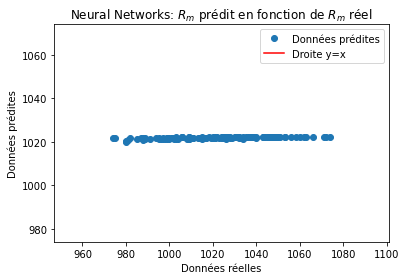

In [71]:
plt.axis('equal')
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.title("Neural Networks: $R_{m}$ prédit en fonction de $R_{m}$ réel")
plt.xlim(min(min(y_true), min(y_pred)), max(y_true), max(y_pred))
plt.ylim(min(min(y_true), min(y_pred)), max(y_true), max(y_pred))
plt.plot( y_true, y_pred, 'o', label = "Données prédites")
#plt.plot([0,1], [0,1], 'r', label = "Droite y=x")

plt.legend()
plt.show()